In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas_profiling as pp

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)


import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.






from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)




sns.set_theme()
sns.set(rc={'figure.figsize':(12,8),'figure.dpi':100})

import warnings
warnings.filterwarnings('ignore')

C:\Users\Dhananjay\AppData\Local\Temp\ipykernel_10208\1033050641.py:16: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)           # To display all the data in each column


In [2]:
df= pd.read_csv('Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Linear Regression 

In [3]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [5]:
df['Species'].unique()

array([0, 4, 6, 1, 2, 3, 5])

In [6]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


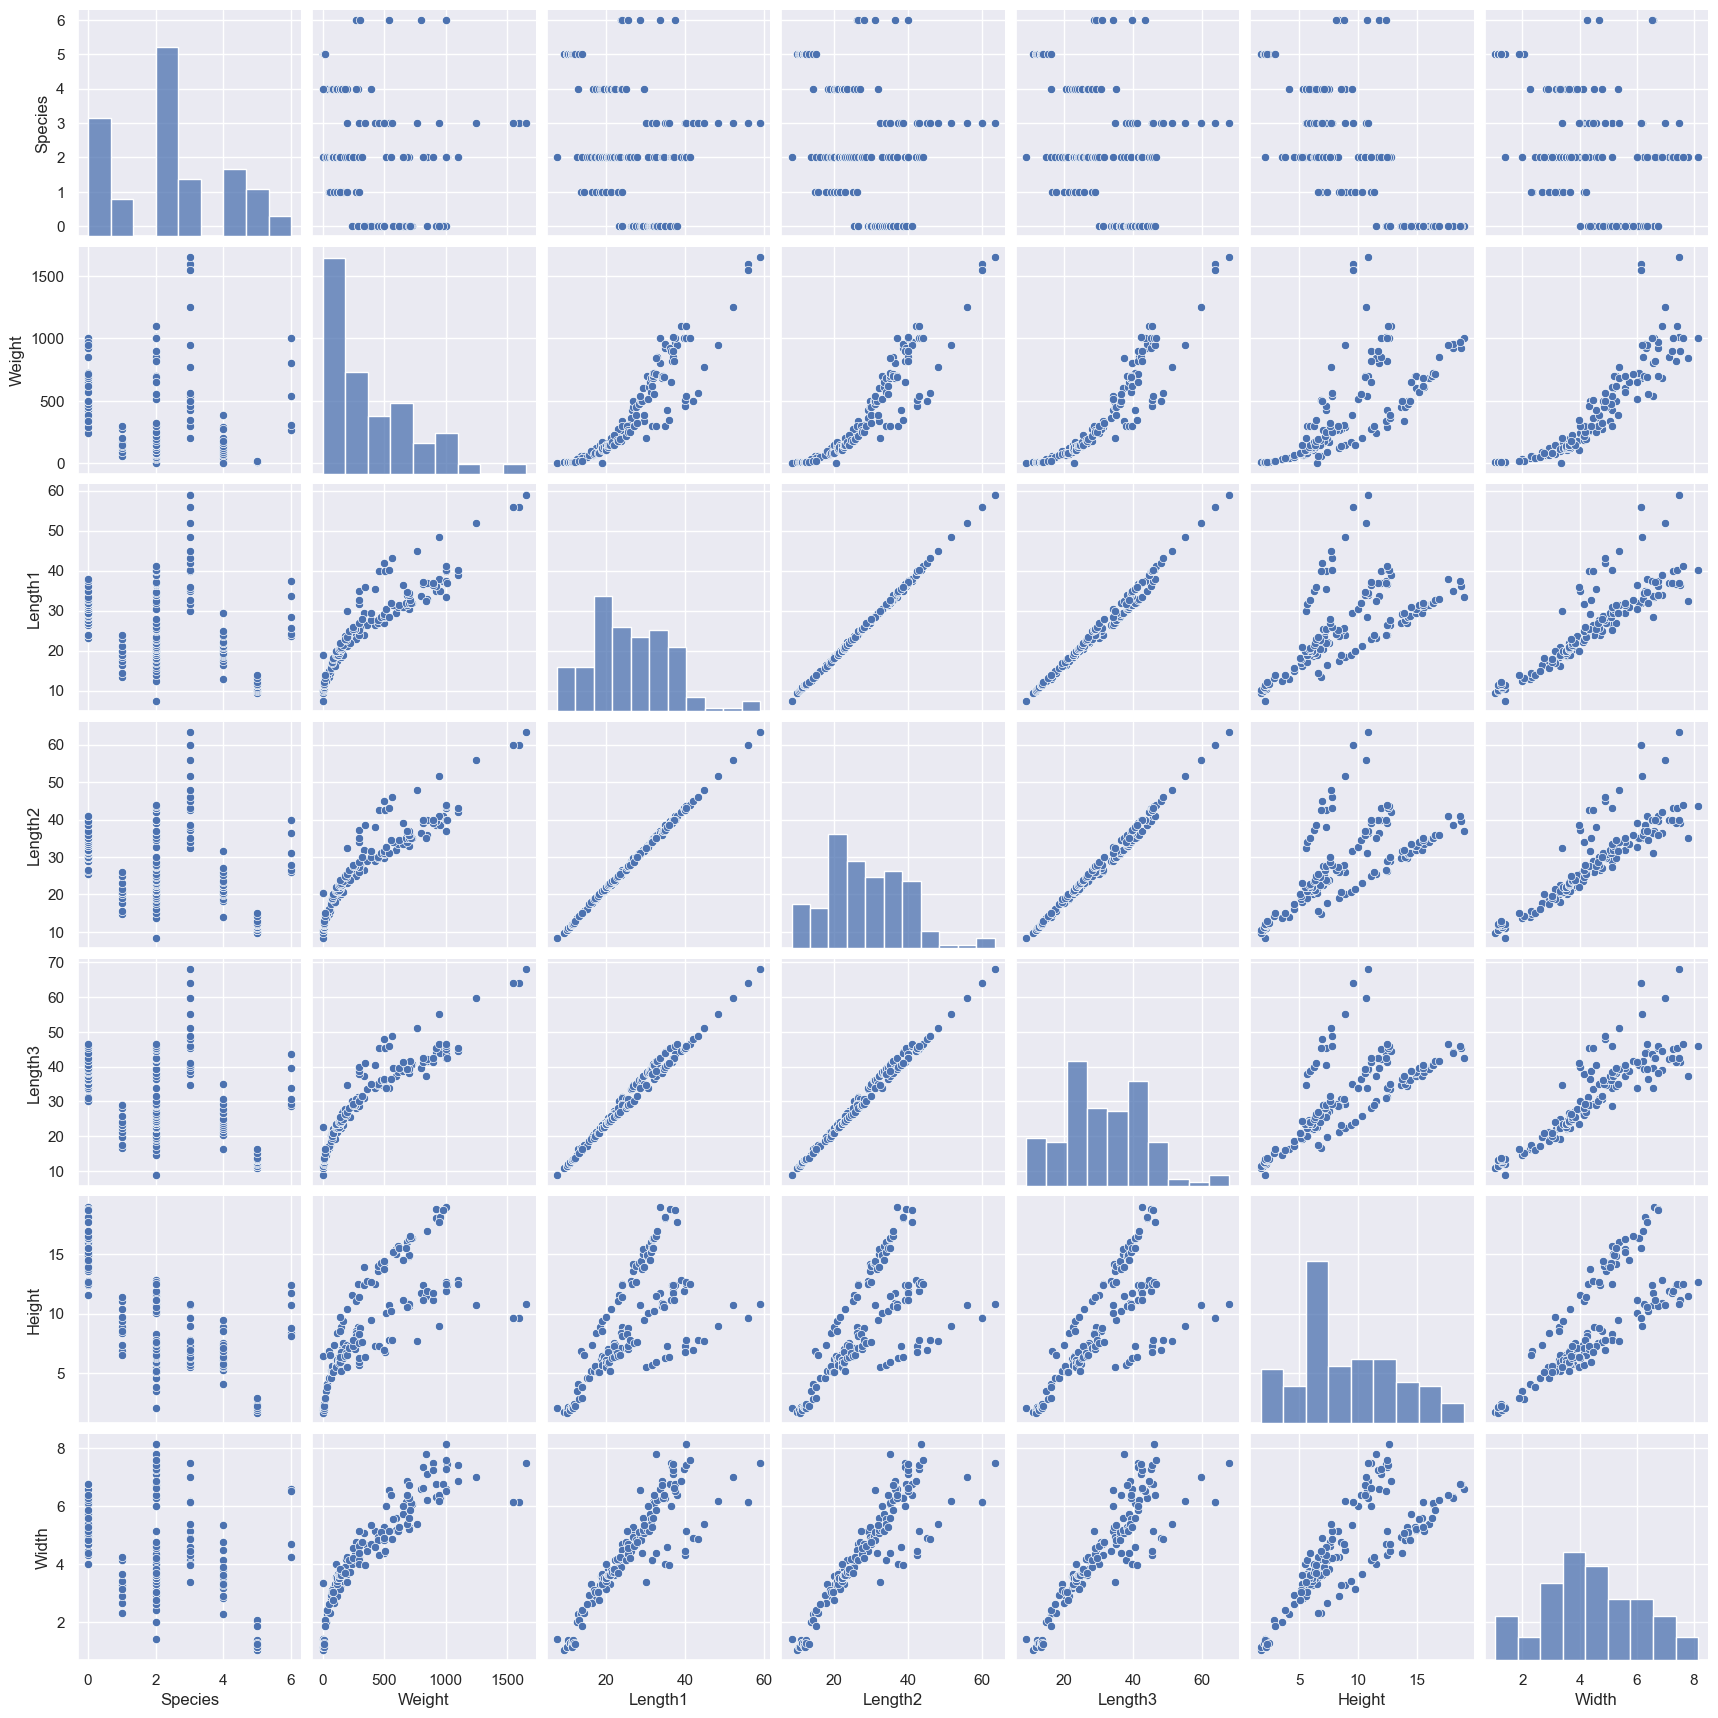

In [7]:
sns.pairplot(df)
plt.show()

In [8]:
df.corr()

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [9]:
x=df.drop('Species',axis=1)
x

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
y=df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3)

In [12]:
x_train

,Weight,Length1,Length2,Length3,Height,Width
124,1000.0,39.8,43.0,45.2,11.9328,7.2772
36,69.0,16.5,18.2,20.3,5.2983,2.8217
147,7.0,10.1,10.6,11.6,1.7284,1.1484
12,500.0,29.1,31.5,36.4,13.7592,4.3680
62,60.0,14.3,15.5,17.4,6.5772,2.3142
...,...,...,...,...,...,...
103,260.0,25.4,27.5,28.9,7.1672,4.3350
59,800.0,33.7,36.4,39.6,11.7612,6.5736
37,78.0,17.5,18.8,21.2,5.5756,2.9044
118,820.0,36.6,39.0,41.3,12.4313,7.3514


In [13]:
x_test

,Weight,Length1,Length2,Length3,Height,Width
25,725.0,31.8,35.0,40.9,16.3600,6.0532
72,5.9,7.5,8.4,8.8,2.1120,1.4080
77,100.0,16.2,18.0,19.2,5.2224,3.3216
108,320.0,27.8,30.0,31.6,7.6156,4.7716
44,145.0,20.5,22.0,24.3,6.6339,3.5478
49,161.0,22.0,23.4,26.7,6.9153,3.6312
121,1015.0,37.0,40.0,42.4,12.3808,7.4624
94,150.0,21.0,23.0,24.5,5.2185,3.6260
70,273.0,23.0,25.0,28.0,11.0880,4.1440
0,242.0,23.2,25.4,30.0,11.5200,4.0200


In [14]:
y_train

124    2
36     4
147    5
12     0
62     1
      ..
103    2
59     6
37     4
118    2
33     0
Name: Species, Length: 111, dtype: int32

In [15]:
y_test

25     0
72     2
77     2
108    2
44     4
49     4
121    2
94     2
70     1
0      0
86     2
71     1
92     2
139    3
47     4
65     1
83     2
117    2
42     4
122    2
34     0
90     2
69     1
104    2
54     4
10     0
112    2
9      0
107    2
158    5
114    2
125    2
152    5
13     0
57     6
127    2
132    3
1      0
138    3
109    2
142    3
98     2
131    3
137    3
11     0
79     2
48     4
5      0
Name: Species, dtype: int32

In [16]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [17]:
model.intercept_

5.613577724279812

In [18]:
model.coef_

array([ 0.00321535,  0.67277995, -1.4996301 ,  0.73774423, -0.71565238,
        0.8434506 ])

In [19]:
train_pred = model.predict(x_train)
train_pred

array([ 2.06573271,  3.20746933,  4.82460171,  0.25207707,  2.26465932,
        2.65355054,  2.42163764,  2.16814654, -0.60161766,  2.42429523,
        3.56421015, -0.67134185,  2.43282619,  2.92483196,  1.94046746,
        4.74434551,  1.15690197,  2.25992258,  2.73702935,  3.28719749,
        2.41612569,  0.46947641,  2.53789174,  2.47838863,  1.09261038,
        4.22688134,  2.69935034,  3.03203867,  3.15359846,  2.32555118,
        0.43760043,  0.6334147 ,  2.23179525,  4.78241295,  2.92510474,
        2.06302651,  1.44942381, -0.30448553,  2.66746484,  4.27435212,
        0.92560923,  4.44847671,  4.1651345 ,  2.33260368,  3.199123  ,
        2.61945885,  4.65949282,  3.65062817,  2.4685013 ,  4.80245924,
        3.58753079,  2.1273923 ,  2.34984677,  4.59106689,  2.61708123,
        1.84357325, -0.19091891,  3.84287359,  2.2264164 ,  1.4917996 ,
        3.09930505,  0.35020055,  4.71539789,  0.5979955 ,  2.78171358,
        4.925631  ,  0.90773432,  0.54473888,  3.10086282,  2.87

In [20]:
test_pred = model.predict(x_test)
test_pred

array([ 0.42329375,  4.24977487,  3.06967742,  2.24407232,  3.05194213,
        3.6526208 ,  2.4989803 ,  3.1312198 ,  0.69149763,  1.1882646 ,
        2.30156728,  0.56473395,  2.04800684,  3.05837586,  3.65055554,
        1.42106006,  2.4280145 ,  1.4103577 ,  3.44630765,  2.20251165,
       -0.18503049,  3.18538683,  0.74795988,  2.24509964,  2.72606019,
        0.56355945,  2.72856577,  1.0648851 ,  2.32404409,  3.90550786,
        2.1858243 ,  2.51305357,  4.61563353,  0.40535663,  2.22022152,
        2.34437911,  2.41550805,  0.97031437,  1.97717322,  1.57938294,
        3.98353107,  2.55576075,  2.30713566,  2.55497072,  0.52379395,
        2.39150138,  2.87644116,  0.57312543])

In [21]:
from sklearn.metrics import mean_squared_error
train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

In [22]:
print(train_RMSE)

1.0366702825450342


In [23]:
print(test_RMSE)

0.912061151088566


In [24]:
model.score(x_train,y_train)

0.6633308601645926

In [25]:
model.score(x_test,y_test)

0.6132778103670702

In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,x,y,cv=5)
print(scores)


cv_score = scores.mean()
print(cv_score)

[  0.          -0.82175849 -11.38400898   0.          -4.14013086]
-3.2691796672137032


you can see the cross validation score is not equal to test accuracy so for this Data set Linear Regression is not valid.

check assumption

Also for Linear Regression I check for Assumption

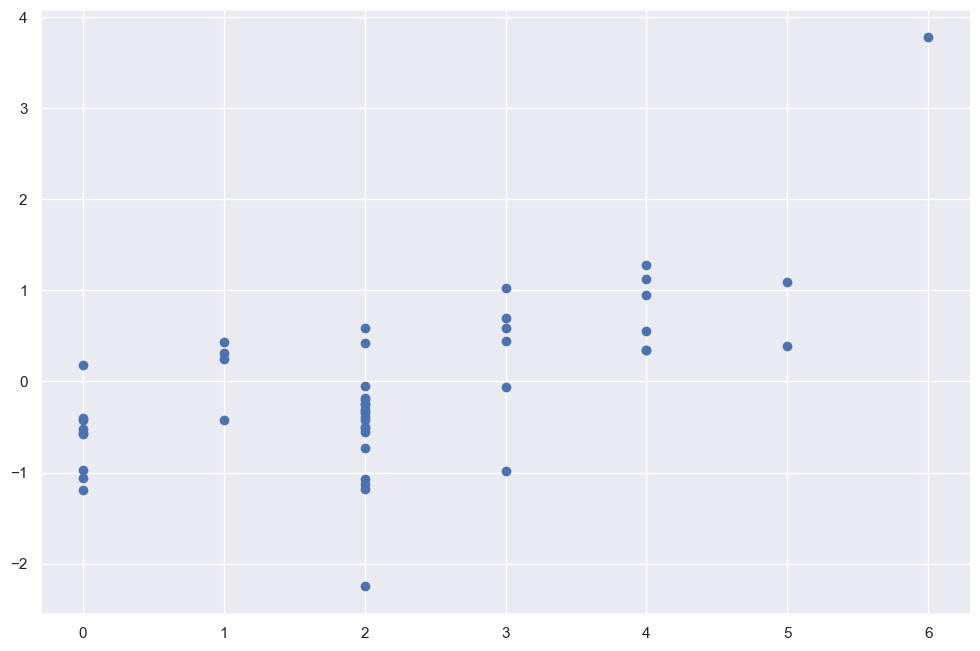

In [27]:
test_res = y_test- test_pred
plt.scatter(y_test,test_res)
plt.show()

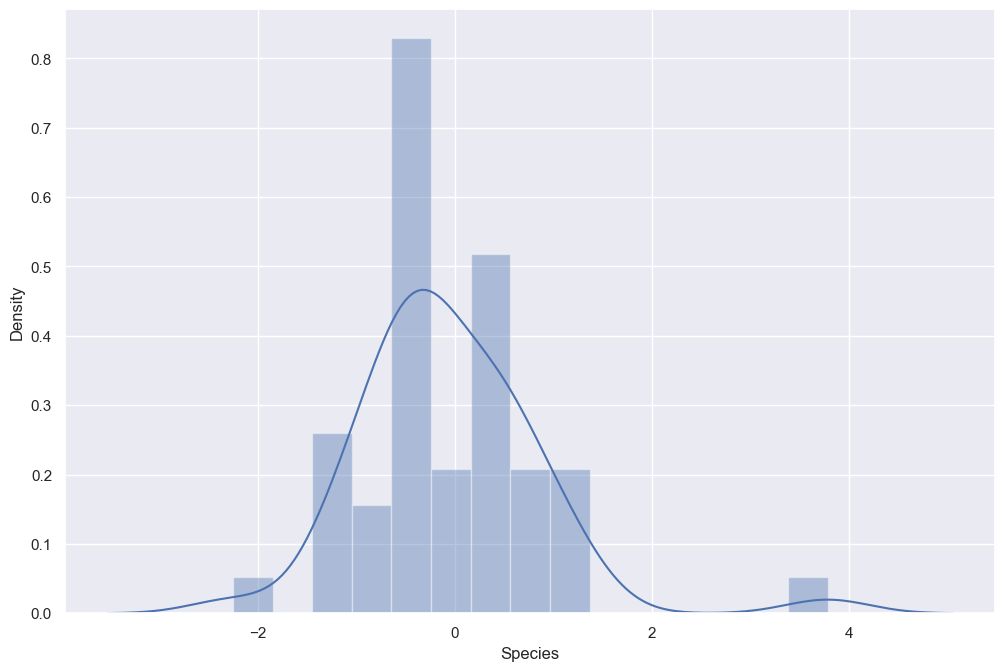

In [28]:
sns.distplot(test_res,bins=15,kde=True)
plt.show()

if Linear Regression is good Model for this data set then it show perfect Normal Distribution but
the Dist Plot show  Right Skew. so from this point we also that Linear Regresssion Model is again
fail to this Data Set 

# Logistic Regression 

In [29]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [30]:
train_pred = model.predict(x_train)
train_pred

array([ 2.06573271,  3.20746933,  4.82460171,  0.25207707,  2.26465932,
        2.65355054,  2.42163764,  2.16814654, -0.60161766,  2.42429523,
        3.56421015, -0.67134185,  2.43282619,  2.92483196,  1.94046746,
        4.74434551,  1.15690197,  2.25992258,  2.73702935,  3.28719749,
        2.41612569,  0.46947641,  2.53789174,  2.47838863,  1.09261038,
        4.22688134,  2.69935034,  3.03203867,  3.15359846,  2.32555118,
        0.43760043,  0.6334147 ,  2.23179525,  4.78241295,  2.92510474,
        2.06302651,  1.44942381, -0.30448553,  2.66746484,  4.27435212,
        0.92560923,  4.44847671,  4.1651345 ,  2.33260368,  3.199123  ,
        2.61945885,  4.65949282,  3.65062817,  2.4685013 ,  4.80245924,
        3.58753079,  2.1273923 ,  2.34984677,  4.59106689,  2.61708123,
        1.84357325, -0.19091891,  3.84287359,  2.2264164 ,  1.4917996 ,
        3.09930505,  0.35020055,  4.71539789,  0.5979955 ,  2.78171358,
        4.925631  ,  0.90773432,  0.54473888,  3.10086282,  2.87

In [31]:
test_pred = model.predict(x_test)
test_pred

array([ 0.42329375,  4.24977487,  3.06967742,  2.24407232,  3.05194213,
        3.6526208 ,  2.4989803 ,  3.1312198 ,  0.69149763,  1.1882646 ,
        2.30156728,  0.56473395,  2.04800684,  3.05837586,  3.65055554,
        1.42106006,  2.4280145 ,  1.4103577 ,  3.44630765,  2.20251165,
       -0.18503049,  3.18538683,  0.74795988,  2.24509964,  2.72606019,
        0.56355945,  2.72856577,  1.0648851 ,  2.32404409,  3.90550786,
        2.1858243 ,  2.51305357,  4.61563353,  0.40535663,  2.22022152,
        2.34437911,  2.41550805,  0.97031437,  1.97717322,  1.57938294,
        3.98353107,  2.55576075,  2.30713566,  2.55497072,  0.52379395,
        2.39150138,  2.87644116,  0.57312543])

In [32]:
log_model.score(x_train,y_train)

0.7747747747747747

In [33]:
log_model.score(x_test,y_test)

0.75

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_model,x,y,cv=5)
score
score.mean()

0.7481854838709678

Here ROC curve is not valid because Roc Curve is only Applicable for Binary Classification Proble
but this Data Set is Multi Classification Problem

# KNN Algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
knn_pred_train = knn_model.predict(x_train)
knn_pred_train

array([0, 2, 5, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 5, 0, 0, 2, 4, 2, 0,
       2, 2, 0, 3, 2, 2, 2, 4, 0, 1, 3, 5, 2, 1, 2, 0, 5, 3, 0, 5, 3, 2,
       1, 2, 5, 2, 2, 5, 2, 4, 2, 5, 2, 0, 0, 2, 2, 2, 0, 0, 5, 0, 2, 5,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 2, 2, 3, 5, 3, 5, 2, 5, 0, 2, 0, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 3, 1, 2, 2, 2, 2, 2,
       0])

In [40]:
knn_pred_test = knn_model.predict(x_test)
knn_pred_test

array([0, 5, 2, 3, 2, 2, 0, 2, 4, 2, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 3, 5, 0, 2, 5, 3, 3, 0, 0, 3, 0, 0, 3, 2, 3, 3,
       0, 2, 2, 0])

In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,knn_pred_train))
print(accuracy_score(y_test,knn_pred_test))

0.6936936936936937
0.4791666666666667


In [42]:
from sklearn.model_selection import cross_val_score
scores =cross_val_score(knn_model,x,y,cv=5)
scores
scores.mean()

0.3836693548387097

Cross validation Score is not close to to test accuracy so for this model KNN Algorithm is not
best Algorithm 

In [43]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors' : list(range(1,31)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

cv_classifier.fit(x_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 1, 'p': 1}

In [45]:
#modeling
knn_model = KNeighborsClassifier(n_neighbors=1,p=1)
knn_model.fit(x_train,y_train)

#prediction 
knn_pred_train = knn_model.predict(x_train)
knn_pred_test = knn_model.predict(x_test)

#Evaluation 
print(accuracy_score(y_train,knn_pred_train))
print(accuracy_score(y_test,knn_pred_test))

#cross validation Score

scores = cross_val_score(knn_model,x,y,cv=5)
scores.mean()

1.0
0.5625


0.4328629032258064

by applying Hyper Parameter Tunning again the test accuracy is not similar to cross validation score
so from here we can say that for this data set KNN Algorithm is not best Algorithm

# SVM

In [46]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)


SVC()

In [47]:
svm_pred_train = svm_model.predict(x_train)
svm_pred_test = svm_model.predict(x_test)

In [48]:
print(accuracy_score(y_train,svm_pred_train))
print(accuracy_score(y_test,svm_pred_test))

0.46846846846846846
0.4375


In [49]:
scores= cross_val_score(svm_model,x,y,cv=5)
scores.mean()

0.4457661290322581

from here you can see the difference between test accuracy and cross validation is more than 5% so 
from that we can say that SVM Algorithm is not best Algorithm for this DATASET. 

We can also check by Applying Hyper Parameter Tunning 

In [50]:
from sklearn.model_selection import GridSearchCV
estimator = SVC()

param_grid = {'C':[0.01,0.1,10,100],'kernel':['linear','rbf','sigmoid','poly']}
grid =  GridSearchCV(estimator,param_grid,cv=5)
grid.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 10, 100],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']})

In [51]:
grid.best_params_

{'C': 100, 'kernel': 'linear'}

Rebuild the SVM Model with Best Hyper Parameter Tunning 

In [52]:
#modelling 
svm_model = SVC(kernel= 'linear',C=100)
svm_model.fit(x_train,y_train)

#prediction

svm_pred_train = svm_model.predict(x_train)
svm_pred_test = svm_model.predict(x_test)

#Evaluation

print(accuracy_score(y_train,svm_pred_train))
print(accuracy_score(y_test,svm_pred_test))

#cross validation score
scores = cross_val_score(svm_model,x,y,cv=5)
scores.mean()

1.0
0.875


0.8669354838709677

is you see the cross validation score is not equall to test accuracy so from here you can say that 
SVM is also not Good algoritm for this DataSet

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
dt_pred_train = dt_model.predict(x_train)
dt_pred_test = dt_model.predict(x_test)

In [55]:
print(accuracy_score(y_train,dt_pred_train))
print(accuracy_score(y_test,dt_pred_test))

1.0
0.6458333333333334


In [56]:
scores = cross_val_score(dt_model,x,y,cv=5)
scores
scores.mean()

0.4443548387096774

from Here also the cross validation score is not equal to test accuracy so Decision Tree is not 
best Algorithm for this Data Set 

In [57]:
dt_model.predict([[80.0,17.2,19.0,20.2,5.6358,3.0502]])

array([4])

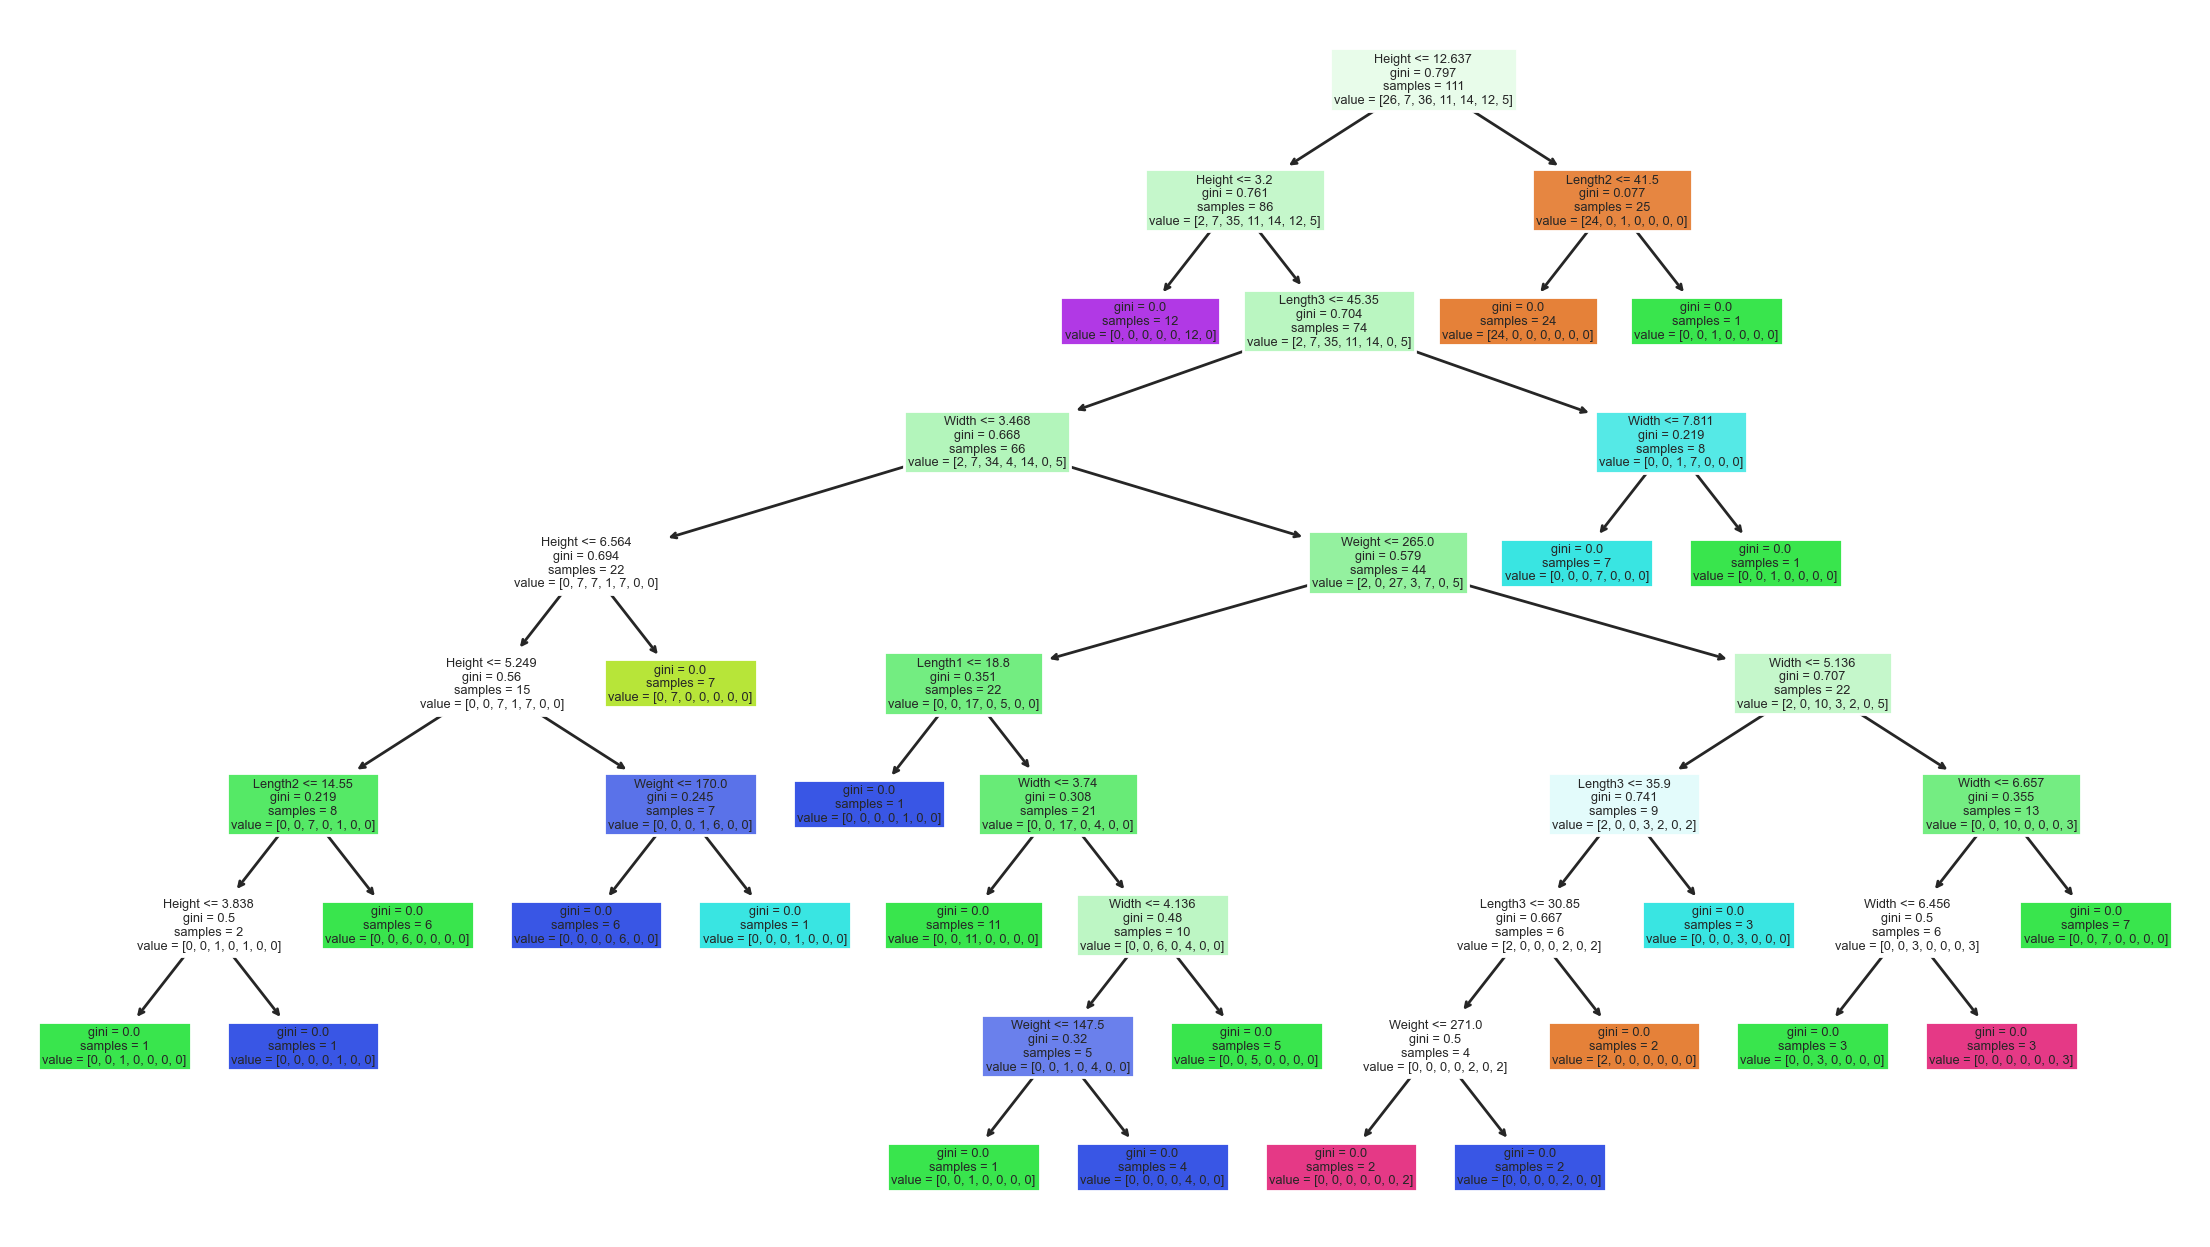

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=200)
plot_tree(dt_model,filled=True,feature_names=x.columns)
plt.show()

In [59]:
dt_model.feature_importances_

array([0.08478373, 0.01415021, 0.0301987 , 0.1236661 , 0.5337902 ,
       0.21341107])

In [60]:
pd.DataFrame(index=x.columns,data=dt_model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Weight,0.084784
Length1,0.014150
Length2,0.030199
Length3,0.123666
Height,0.533790
Width,0.213411


Decision Tree by using Hyper Parameter tunning 

In [61]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
param_grid = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4]}
grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4]},
             scoring='accuracy')

In [62]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

# Rebuild a Model according to Hyper Parameter Tunning 

In [63]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [64]:
dt_pred_train = dt_model.predict(x_train)
dt_pred_test = dt_model.predict(x_test)

In [65]:
print(accuracy_score(y_train,dt_pred_train))
print(accuracy_score(y_test,dt_pred_test))

0.7567567567567568
0.6458333333333334


In [66]:
scores= cross_val_score(dt_model,x,y,cv=5)
scores.mean()

0.5389112903225806

From Here you can see the test accuracy is not similar to Cross validation Score so from here you can say that the Decision Tree Algorithm is also not good Algorithm for this Dataset. 

# Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(random_state=0)
Rf_model.fit(x_train,y_train)

Rf_pred_train = Rf_model.predict(x_train)
Rf_pred_test = Rf_model.predict(x_test)

print(accuracy_score(y_train,Rf_pred_train))
print(accuracy_score(y_test,Rf_pred_test))

scores=cross_val_score(Rf_model,x,y,cv=5)
scores.mean()


1.0
0.7708333333333334


0.4776209677419355

Random Forest with Hyper Parameter Tunning

In [68]:
from sklearn.model_selection import GridSearchCV

estimator = RandomForestClassifier()

param_grid = {'n_estimators':list(range(1,101))}


grid = GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 54}

In [69]:
Rf_model = RandomForestClassifier(n_estimators=10,random_state=0)
Rf_model.fit(x_train,y_train)

Rf_pred_train = Rf_model.predict(x_train)
Rf_pred_test = Rf_model.predict(x_test)

print(accuracy_score(y_train,Rf_pred_train))
print(accuracy_score(y_test,Rf_pred_test))

scores = cross_val_score(Rf_model,x,y,cv=5,scoring='accuracy')
scores
scores.mean()

0.990990990990991
0.7916666666666666


0.4397177419354839

from Here you can see that the cross validation scores is not equall to test accuracy so Random Forest is also not good Model for this Data Set 

# Ada Boost Classifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
Ad_model = AdaBoostClassifier(random_state=0)
Ad_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=0)

In [71]:
Ad_pred_train = Ad_model.predict(x_train)
Ad_pred_test = Ad_model.predict(x_test)

In [72]:
print(accuracy_score(y_train,Ad_pred_train))
print(accuracy_score(y_test,Ad_pred_test))

0.43243243243243246
0.4375


In [73]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(Ad_model,x,y,cv=5)
scores
scores.mean()

0.4068548387096774

# Ada Boost Classifier with Hyper Parameter Tunning

In [74]:
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier(random_state=0)
param_grid ={'n_estimators':list(range(1,101))}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

grid.best_params_

{'n_estimators': 5}

In [75]:
# Rebuild a Model according to Hyper Parameter tuning 

Ad_model = AdaBoostClassifier(n_estimators=2,random_state=0)
Ad_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=2, random_state=0)

In [76]:
Ad_pred_train = Ad_model.predict(x_train)
Ad_pred_test = Ad_model.predict(x_test)

In [77]:
print(accuracy_score(y_train,Ad_pred_train))
print(accuracy_score(y_test,Ad_pred_test))

0.6396396396396397
0.5833333333333334


In [78]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ad_model,x,y,cv=5)
scores
scores.mean()

0.4881048387096774

from here you can see the Cross validation score is not similar ( close upto 5%) test accuracy so that why 
Ada Boost Classifier is also not a good Algorithm for this Data Set

# Gradient Boost Classifier

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
Gr_model = GradientBoostingClassifier(random_state=0)
Gr_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [80]:
Gr_pred_train= Gr_model.predict(x_train)
Gr_pred_test = Gr_model.predict(x_test)

In [81]:
print(accuracy_score(y_train,Gr_pred_train))
print(accuracy_score(y_test,Gr_pred_test))

1.0
0.7291666666666666


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Gr_model,x,y,cv=5)
scores
scores.mean()

0.5653225806451613

from Here you can see the cross validation score is not equal to test accuracy so you can say that Gradient Boosting Classifier is not a good model for this data set. 

Rebuild the Model By Using Hyper Parameter Tunning

In [83]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid = {'n_estimators':[1,2,3,5,10,15,20,25,30,40],'learning_rate':[0.1,0.2,0.4,0.5,0.8,1]}
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.5, 0.8, 1],
                         'n_estimators': [1, 2, 3, 5, 10, 15, 20, 25, 30, 40]},
             scoring='accuracy')

In [84]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 10}

In [85]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.5, n_estimators=10)

In [86]:
gr_model = GradientBoostingClassifier(n_estimators=40,learning_rate=0.4,random_state=0)
gr_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, n_estimators=40, random_state=0)

In [87]:
gr_pred_train = gr_model.predict(x_train)
gr_pred_test = gr_model.predict(x_test)

In [88]:
print(accuracy_score(y_train,gr_pred_train))
print(accuracy_score(y_test,gr_pred_test))

1.0
0.7291666666666666


In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gr_model,x,y,cv=5)
scores
scores.mean()

0.5715725806451613

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,gr_pred_test)

array([[ 8,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  1,  0,  2,  0,  0],
       [ 0,  0, 15,  0,  4,  1,  0],
       [ 0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  3,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test,gr_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      0.25      0.40         4
           2       0.75      0.75      0.75        20
           3       1.00      1.00      1.00         6
           4       0.30      0.50      0.37         6
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1

    accuracy                           0.73        48
   macro avg       0.67      0.63      0.61        48
weighted avg       0.77      0.73      0.73        48



# XGB Classifier 

In [92]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\Dhananjay\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [93]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [94]:
xgb_pred_train = xgb_model.predict(x_train)
xgb_pred_test =xgb_model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,xgb_pred_train))
print(accuracy_score(y_test,xgb_pred_test))

1.0
0.7708333333333334


In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model,x,y,cv=5)
scores
scores.mean()

0.5022177419354839

from here you can the cross validation score is not equal to test accuracy so you can say that the XGB Classifier is not a good model for this DataSet

Again you can Rebuild the Model By Using Hyper Parameter Tunning 

In [97]:
from sklearn.model_selection import GridSearchCV

estimator=XGBClassifier()
param_grid = {'n_estimators':[10,20,25,30,40,50,60,70,80,90,100],'max_depth':[1,2,3,4],'gamma':[0,0.1,0.2,0.3,0.4,0.5,0.6,1]}

grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [10, 20, 25, 30, 40, 50, 60, 70, 80,
                                          90, 100]},
             scoring='accuracy')

In [98]:
grid.best_params_

{'gamma': 0.2, 'max_depth': 2, 'n_estimators': 40}

In [99]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(gamma=0,max_depth=1,n_estimators=70)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=70, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [100]:
xgb_pred_train = xgb_model.predict(x_train)
xgb_pred_test = xgb_model.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,xgb_pred_train))
print(accuracy_score(y_test,xgb_pred_test))

0.972972972972973
0.7291666666666666


In [102]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_model,x,y,cv=5)
scores
scores.mean()

0.5274193548387097

In [103]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,xgb_pred_test)

array([[ 8,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  3,  0,  0,  0,  0],
       [ 0,  0, 16,  0,  3,  1,  0],
       [ 0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  4,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgb_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      0.25      0.40         4
           2       0.64      0.80      0.71        20
           3       1.00      1.00      1.00         6
           4       0.40      0.33      0.36         6
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1

    accuracy                           0.73        48
   macro avg       0.67      0.61      0.60        48
weighted avg       0.74      0.73      0.71        48

